This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** October 2024
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and the free-boundary problem CASE, the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

READ INPUT FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
     -> READ EQUILI DATA FILE...Done!
Done!
INITIALIZATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE VACUUM VESSEL FIRST WALL...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_CutFEM/TESTs/../src/Element.py:295: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([xi,eta]).reshape((1,2))


Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
     -> COMPUTE INITIAL GUESS...
         -> INITIALISE PSI ARRAYS...Done!
         -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
         -> COMPUTE INITIAL VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
         -> ASSIGN INITIAL BOUNDARY VALUES...Done!
     Done!
Done!


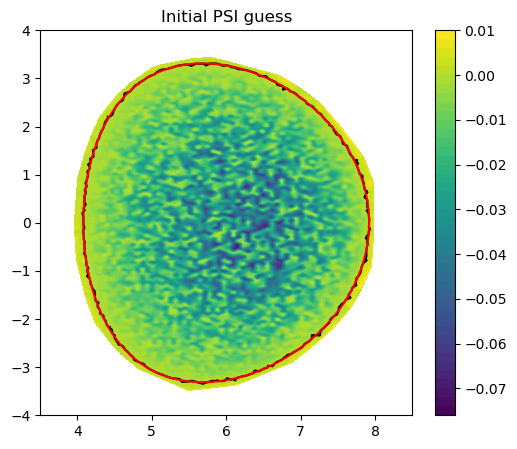

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate along computational boundary edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.27665761e+00 4.27650372e-03]  (ELEMENT  236 ) WITH VALUE PSI_0 =  [-0.03628842]


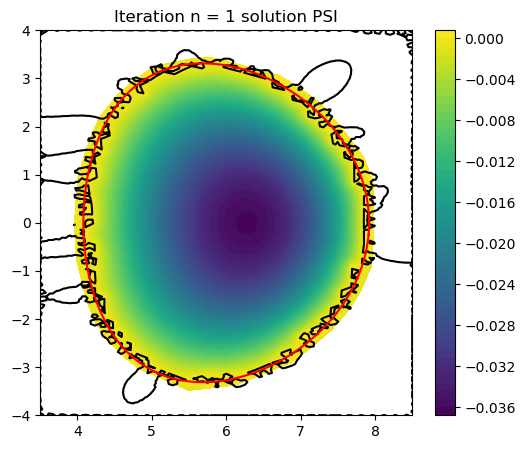

Internal iteration =  1 , PSI_NORM residu =  2.2841369689744746
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate along computational boundary edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
LOCAL EXTREMUM AT  [6.27665761e+00 4.27650371e-03]  (ELEMENT  236 ) WITH VALUE PSI_0 =  [-0.03628842]


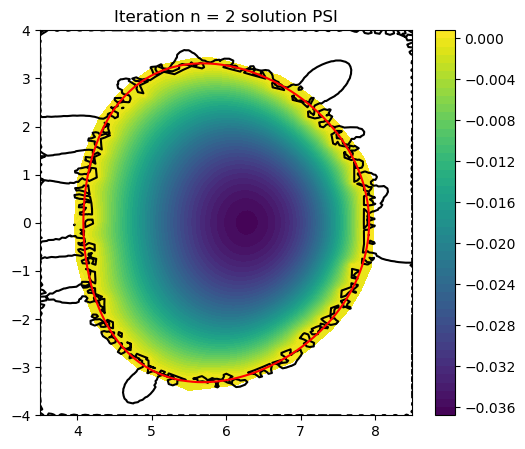

Internal iteration =  2 , PSI_NORM residu =  0.0
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.0
 
SOLUTION CONVERGED


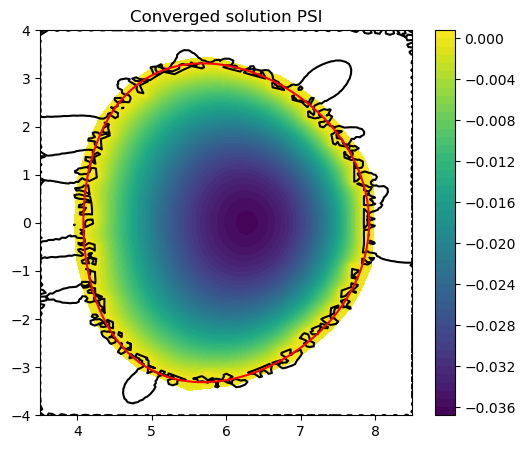

In [ ]:
import sys
sys.path.append('../')

from src.GradShafranovFEMCutFEM import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
MESH = 'TS-FEMCUTFEM-TRI03-MEDIUM'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TS-FEMCUTFEM-TRI06-MEDIUM'

### SELECT SOLUTION CASE FILE:
CASE = 'TS-FIXED-LINEAR'         # FIXED PLASMA BOUNDARY LINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FIXED-NONLINEAR'      # FIXED PLASMA BOUNDARY NONLINEAR PLASMA CURRENT MODEL
#CASE = 'TS-FIXED-ZHENG' 

##############################################################

## CREATE GRAD-SHAFRANOV PROBLEM 
Problem = GradShafranovFEMCutFEM(MESH,CASE)
## DECLARE OUTPUT SWITCHS:
##### OUTPUT PLOTS IN RUNTIME
Problem.plotElemsClassi_output = False        # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Problem.plotPSI_output = True                 # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Problem.PARAMS_output = True                  # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Problem.PSI_output = True                     # OUTPUT SWITCH FOR PSI FIELD VALUES OBTAINED BY SOLVING THE CutFEM SYSTEM
Problem.PSIcrit_output = False                # OUTPUT SWITCH FOR CRITICAL PSI VALUES
Problem.PSI_NORM_output = False               # OUTPUT SWITCH FOR THE PSI_NORM FIELD VALUES (AFTER NORMALISATION OF PSI FIELD)
Problem.PSI_B_output = False                  # OUTPUT SWITCH FOR PSI_B BOUNDARY VALUES
Problem.RESIDU_output = True                  # OUTPUT SWITCH FOR RESIDU FOR EACH ITERATION
Problem.ElementsClassi_output = False         # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Problem.PlasmaLevSetVals_output = False       # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Problem.VacVessLevSetVals_output = False      # OUTPUT SWITCH FOR VACUUM VESSEL BOUNDARY LEVEL-SET FIELD VALUES
Problem.L2error_output = True                 # OUTPUT SWITCH FOR ERROR FIELD AND THE L2 ERROR NORM FOR THE CONVERGED SOLUTION 
Problem.ELMAT_output = False                  # OUTPUT SWITCH FOR ELEMENTAL MATRICES

## COMPUTE PLASMA EQUILIBRIUM
Problem.EQUILI()

0.15133143537717533


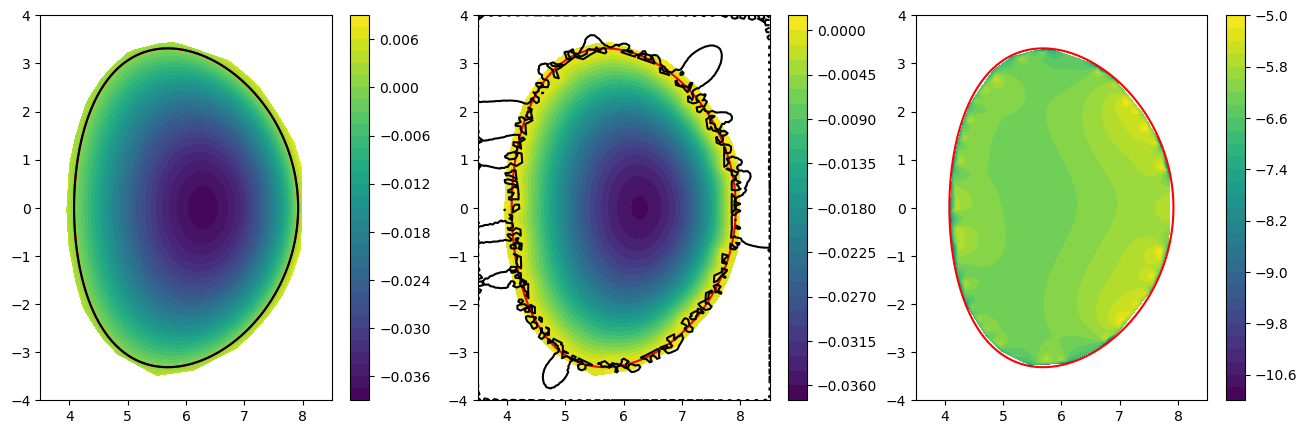

In [5]:
Problem.PlotError()